In [1]:
# fig_generator.ipynb
# Avery Krieger 05/16/2023

# this allows you to edit src code and run 
# (the alternative is to restart the kernel EVERY time you make a change to src...BAD)
%load_ext autoreload
%autoreload 2

from visanalysis.analysis import imaging_data, shared_analysis
from visanalysis.util import plot_tools

from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy import stats
from scipy.stats import wilcoxon
import pingouin as pg

import os
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd

# Multiple ROIs
# Fly 1
mi1_fly1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "proximal_multiple"]]
mi1_fly1_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "medial_multiple"]]
mi1_fly1_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "distal_multiple"]]
# Fly 2
mi1_fly2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "proximal_multiple3"]]
mi1_fly2_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "medial_multiple_sub2"]] #also 'medial_multiple_sub1", "medial_multiple_sub2"
mi1_fly2_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "distal_multiple"]]
# Fly 3
mi1_fly3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_proximal_multiple"]]
mi1_fly3_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_medial_multiple"]] #also 'medial_multiple_sub1", "medial_multiple_sub2"
mi1_fly3_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_distal_multiple"]]
# Fly 4 #less good
mi1_fly4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_proximal_multiple"]]
mi1_fly4_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_medial_multiple"]] 
mi1_fly4_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_distal_multiple"]]
# Fly 5 #less good
mi1_fly5_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_proximal_multiple"]]
mi_fly5_prox_double = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_proximal_multiple_double"]]
mi1_fly5_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_medial_multiple"]] 
mi1_fly5_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_distal_multiple"]]
# Fly 6 (moco)
mi1_fly6_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_proximal_multiple"]]
mi1_fly6_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_medial_multiple"]]
mi1_fly6_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_distal_multiple"]]
# Fly 7 (only prox, kind of medial)
mi1_fly7_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "2", "mi1_proximal_multiple"]]
# Fly 8 (prox only) lotta motion
mi1_fly8_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "6", "mi1_proximal_multiple"]]
# Fly 9
mi1_fly9_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_proximal_multiple"]]
mi1_fly9_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_medial_multiple"]]
mi1_fly9_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_distal_multiple"]]
# Fly 10
mi1_fly10_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_proximal_multiple"]]
mi1_fly10_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_medial_multiple"]]
mi1_fly10_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_distal_multiple_lowcon"]]
# Fly 11
mi1_fly11_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "7", "mi1_proximal_multiple"]]
# Fly 12
mi1_fly12_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_proximal_multiple"]]
mi1_fly12_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_medial_multiple"]]
mi1_fly12_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_distal_multiple"]]
# Fly 13 # kinda shitty b/c motion
mi1_fly13_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "2", "mi1_proximal_multiple"]]
# Fly 14 # kinda shitty b/c motion
mi1_fly14_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "3", "mi1_proximal_multiple"]]
# Fly 15
mi1_fly15_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "1", "mi1_proximal_multiple"]]
# Fly 16
mi1_fly16_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "3", "mi1_proximal_multiple"]]
# Fly 17
mi1_fly17_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "4", "mi1_proximal_multiple"]]
# Fly 18
mi1_fly18_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "1", "mi1_proximal_multiple"]]
# Fly 19
mi1_fly19_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "2", "mi1_proximal_multiple"]]
# Fly 20
mi1_fly20_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "3", "mi1_proximal_multiple"]]
# Fly 21
mi1_fly21_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "5", "mi1_proximal_multiple"]]
# Fly 22 #5/09/23
mi1_fly22_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "3", "mi1_proximal_multiple"]]
mi1_fly22_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "3", "mi1_distal_multiple"]]
# Fly 23 #5/09/23
mi1_fly23_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "4", "mi1_proximal_multiple"]]
mi1_fly23_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "4", "mi1_distal_multiple"]]
# Fly 24 #5/09/23
mi1_fly24_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "5", "mi1_proximal_multiple"]]
mi1_fly24_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "5", "mi1_distal_multiple"]]


# CONTROL FLIES
# control fly 1 - several ROI name options here: mi1_proximal_multiple_lessbi mi1_proximal_multiple_morebi
mi1_control1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_proximal_multiple_morebi"]]
mi1_control1_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_medial_multiple"]]
mi1_control1_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_distal_multiple"]]
# control fly 2
mi1_control2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "5", "mi1_proximal_multiple"]]
# control fly 3
mi1_control3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "1", "mi1_proximal_multiple"]]
mi1_control3_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "1", "mi1_distal_multiple"]]
# control fly 4
mi1_control4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "2", "mi1_proximal_multiple"]]
# control fly 5
mi1_control5_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "6", "mi1_proximal_multiple"]]
mi1_control5_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "6", "mi1_distal_multiple"]]




mi1_prox_all = np.concatenate(
                             (mi1_fly1_prox, mi1_fly2_prox, mi1_fly3_prox, 
                             mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox,
                             mi1_fly7_prox, mi1_fly8_prox, mi1_fly9_prox,
                             mi1_fly10_prox, mi1_fly11_prox, mi1_fly12_prox,
                             mi1_fly13_prox, mi1_fly14_prox, mi1_fly15_prox,
                             ), 
                             axis = 0,
                            )

mi1_prox_goodish = np.concatenate(
                             (mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox,
                             mi1_fly7_prox, mi1_fly8_prox, mi1_fly9_prox,
                             mi1_fly10_prox, mi1_fly11_prox, mi1_fly12_prox,
                             mi1_fly13_prox, mi1_fly14_prox, mi1_fly15_prox, 
                             mi1_fly16_prox, mi1_fly17_prox, mi1_fly18_prox,
                             mi1_fly19_prox, mi1_fly20_prox, mi1_fly21_prox,),
                             axis = 0,
                             )

mi1_prox_good = np.concatenate(
                             (mi1_fly6_prox, mi1_fly8_prox, mi1_fly16_prox, mi1_fly17_prox,
                              mi1_fly18_prox, mi1_fly19_prox, mi1_fly20_prox, mi1_fly21_prox,
                              mi1_fly22_prox, mi1_fly23_prox, mi1_fly24_prox,),
                             axis = 0,
                             )

fly_list_prox = [6, 8, 16, 17, 18, 19, 20, 21, 22, 23, 24]

mi1_dist_good = np.concatenate(
                             (mi1_fly6_dist, mi1_fly22_dist, mi1_fly23_dist, mi1_fly24_dist,
                             ),
                             axis = 0,
                             )
fly_list_dist = [6, 22, 23, 24]

mi1_medi_good = np.concatenate(
                             (mi1_fly6_medi,
                             ),
                             axis = 0,
                             )
fly_list_medi = [6]
                             
mi1_medi_all = np.concatenate(
                       (mi1_fly1_medi, mi1_fly2_medi, mi1_fly3_medi,mi1_fly4_medi, mi1_fly5_medi, mi1_fly6_medi,), 
                        axis = 0,
                      )
mi1_dist_all = np.concatenate(
                       (mi1_fly1_dist, mi1_fly2_dist, mi1_fly3_dist, mi1_fly4_dist, mi1_fly5_dist, mi1_fly6_dist,), 
                        axis = 0,
                      )
mi1_all_multiple = np.concatenate(
                                  (mi1_fly1_prox, mi1_fly2_prox, mi1_fly3_prox, mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox, 
                                   mi1_fly1_medi, mi1_fly2_medi, mi1_fly3_medi, mi1_fly4_medi, mi1_fly5_medi, mi1_fly6_medi,
                                   mi1_fly1_dist, mi1_fly2_dist, mi1_fly3_dist, mi1_fly4_dist, mi1_fly5_dist, mi1_fly6_dist,),
                                   axis = 0,
                                 )

# control flies
mi1_control_prox = np.concatenate(
                                  (mi1_control1_prox, mi1_control2_prox, mi1_control3_prox, mi1_control4_prox, mi1_control5_prox,),
                                  axis = 0,
                                 )
fly_list_control_prox = [1, 2, 3, 4, 5]

mi1_control_dist = np.concatenate(
                                  (mi1_control1_prox, mi1_control3_prox, mi1_control5_prox,),
                                  axis = 0,
                                 )
fly_list_control_dist = [1, 3, 5]

fly_list_control_medi = [1]

# all good flies
mi1_all_good = [mi1_prox_good, mi1_medi_good, mi1_dist_good]

#all flies for mi1_control
mi1_control_all = [mi1_control_prox, mi1_control1_medi, mi1_control1_dist]

# Hardcoded fly indecies. Must be updated above when fly identies added/changed:
fly_list_exp = [fly_list_prox, fly_list_medi, fly_list_dist]
fly_list_control = [fly_list_control_prox, fly_list_control_medi, fly_list_control_dist]
layer_list = ('Proximal', 'Medial', 'Distal')

# Housekeeping:
condition_name = 'current_led_intensity'
save_directory = "/Volumes/ABK2TBData/lab_repo/analysis/outputs/flash_w_opto_step/" #+ experiment_file_name + "/"
Path(save_directory).mkdir(exist_ok=True)

def visFlash(ID):
    pre_time = ID.getRunParameters('pre_time')
    flash_times = ID.getRunParameters('flash_times')
    flash_width = ID.getRunParameters('flash_width')
    
    flash_start = flash_times + pre_time
    flash_end = flash_start + flash_width
    
    return flash_start, flash_end

def convertRGBtoFraction(R_value, G_Value, B_Value):
    R_Fraction = R_value/255
    G_Fraction = G_Value/255
    B_Fraction = B_Value/255

    return (R_Fraction, G_Fraction, B_Fraction)


/Users/averykrieger/envs/stim_analysis/lib/python3.9/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## Plotting Function tests

In [29]:
def config_matplotlib():
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Helvetica'})

config_matplotlib()

paleDarkBlue = convertRGBtoFraction(82, 63, 232)

# Determine percentage values of opto
opto_1 = ((0.25/4)*100)
opto_2 = ((1/2)*100)
opto_3 = ((4/4)*100)
opto_values = (str(opto_1)+'%', str(opto_2)+'%', str(opto_3)+'%')

Create a generic plot using control data and no opto to illustrate trial structure

Fig Mi1 B

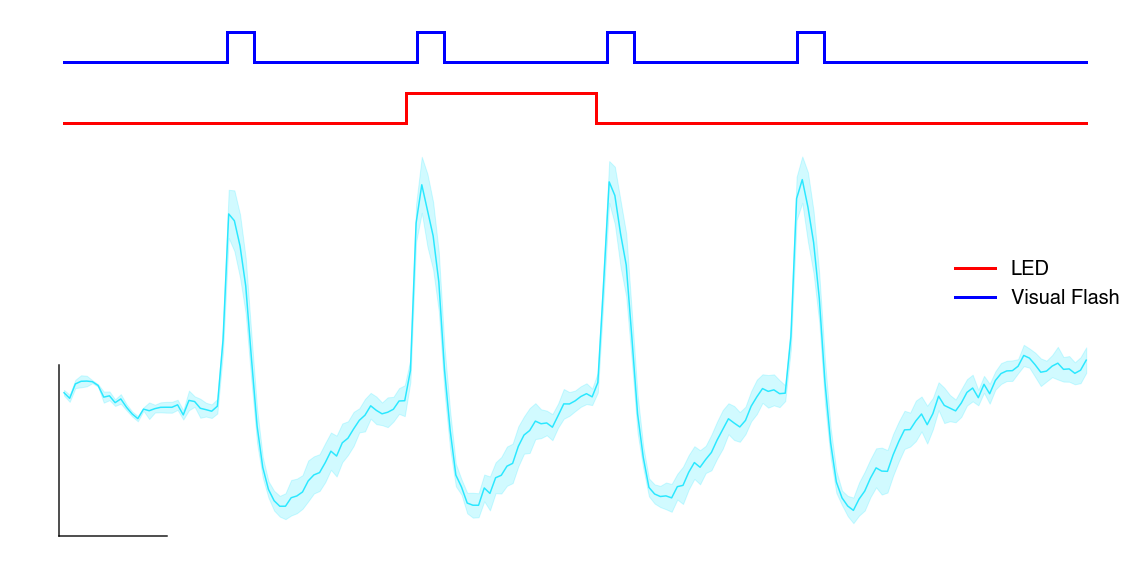

In [53]:
which_layer = mi1_control_prox[2]
save_fig = True

file_path = os.path.join(which_layer[0], which_layer[1] + ".hdf5")
ID = imaging_data.ImagingDataObject(file_path, which_layer[2], quiet=True)
roi_data = ID.getRoiResponses(which_layer[3])
unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key='current_led_intensity')

# Calculate the mean and SEM of mean_response across ROIs
cross_roi_mean_response = np.mean(mean_response, axis=0)
cross_roi_sem_response = np.std(mean_response, axis=0) / np.sqrt(mean_response.shape[0])
cross_roi_sem_plus = cross_roi_mean_response + cross_roi_sem_response
cross_roi_sem_minus = cross_roi_mean_response - cross_roi_sem_response

# finding vis flash locations 
flash_start, flash_end = visFlash(ID)
min_val = np.min(cross_roi_sem_minus.mean(axis=0))
max_val = np.max(cross_roi_sem_plus.mean(axis=0))
y_low = min_val-abs(0.1*min_val)
y_high = max_val+abs(0.25*max_val)


# Figure plotting!
cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.1, 1.0, len(unique_parameter_values))]

fh, ax = plt.subplots(1, 1, figsize=(16, 8))
# Plotting function stuff
plot_tools.cleanAxes(ax)

# Plotting the mean response across ROIs
for up_ind, up in enumerate([0]): # up = unique parameter
    ax.plot(roi_data['time_vector'], cross_roi_mean_response[up_ind, :], color=colors[up_ind], alpha=0.9,)
    ax.fill_between(roi_data['time_vector'], cross_roi_sem_plus[up_ind, :], 
                    cross_roi_sem_minus[up_ind, :],
                    color=colors[up_ind], alpha=0.2)
    
# OPTO stim plotting
# plot a stepwise function above for the opto stim. It increases at led_start_time and decreases at led_end_time
led_start_time = ID.getRunParameters('pre_time')+ID.getRunParameters('led_time')
led_end_time = led_start_time + ID.getRunParameters('led_duration')        
# plot the stepwise function
led_base = y_high*0.9
led_high = y_high*1
ax.plot([0, led_start_time], [led_base, led_base], color='r', linewidth=3, label='LED')
ax.plot([led_start_time, led_start_time], [led_base, led_high], color='r', linewidth=3)
ax.plot([led_start_time, led_end_time], [led_high, led_high], color='r', linewidth=3)
ax.plot([led_end_time, led_end_time], [led_high, led_base], color='r', linewidth=3)
ax.plot([led_end_time, roi_data['time_vector'][-1]], [led_base, led_base], color='r', linewidth=3)

# VISUAL flash stim plotting
# plot a stepwise function that increases at each visual flash start time and decreases at each visual flash end time
vis_base = y_high*1.1
vis_high = y_high*1.2
ax.plot([0, flash_start[0]], [vis_base, vis_base], color='b', linewidth=3, label='Visual Flash')
for flash in range(len(flash_start)):
    ax.plot([flash_start[flash], flash_start[flash]], [vis_base, vis_high], color='b', linewidth=3)
    ax.plot([flash_start[flash], flash_end[flash]], [vis_high, vis_high], color='b', linewidth=3)
    ax.plot([flash_end[flash], flash_end[flash]], [vis_high, vis_base], color='b', linewidth=3)
    if flash != len(flash_start)-1:
        ax.plot([flash_end[flash], flash_start[flash+1]], [vis_base, vis_base], color='b', linewidth=3)
    else:
        ax.plot([flash_end[flash], roi_data['time_vector'][-1]], [vis_base, vis_base], color='b', linewidth=3)

# Legend, Grid, Axis
ax.legend(loc="center right", fontsize=20, frameon=False,)
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('DF/F')
#ax.set_title(f'{which_layer[1]} Series: {which_layer[2]} | Conditions: {condition_name} | ROI={which_layer[3]}', fontsize=20)
# add scalebar from Max's visanalysis/visanalysis/util/plot_tools.py
plot_tools.addScaleBars(ax, dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)
fh.set_tight_layout(True)

if save_fig == True:
    fh.savefig(
    save_directory
    + "B.AverageTrace"
    + str(which_layer[1])
    + ".Series"
    + str(which_layer[2])
    + ".ROI"
    + str(which_layer[3])
    + ".Conditions:"
    + str(condition_name)
    + ".pdf",
    dpi=300, bbox_inches='tight', transparent=False,
    )

In [30]:
def plotFlashWithOptoStepTrial(which_layer, save_fig=False):
    file_path = os.path.join(which_layer[0], which_layer[1] + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, which_layer[2], quiet=True)
    roi_data = ID.getRoiResponses(which_layer[3])
    unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key='current_led_intensity')

    # Calculate the mean and SEM of mean_response across ROIs
    cross_roi_mean_response = np.mean(mean_response, axis=0)
    cross_roi_sem_response = np.std(mean_response, axis=0) / np.sqrt(mean_response.shape[0])
    cross_roi_sem_plus = cross_roi_mean_response + cross_roi_sem_response
    cross_roi_sem_minus = cross_roi_mean_response - cross_roi_sem_response

    # finding vis flash locations 
    flash_start, flash_end = visFlash(ID)
    min_val = np.min(cross_roi_sem_minus.mean(axis=0))
    max_val = np.max(cross_roi_sem_plus.mean(axis=0))
    y_low = min_val-abs(0.1*min_val)
    y_high = max_val+abs(0.25*max_val)


    # Figure plotting!
    cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
    colors = [cmap(i) for i in np.linspace(0.1, 1.0, len(unique_parameter_values))]

    fh, ax = plt.subplots(1, 1, figsize=(16, 8))
    # Plotting function stuff
    plot_tools.cleanAxes(ax)

    # Plotting the mean response across ROIs
    for up_ind, up in enumerate(unique_parameter_values): # up = unique parameter
        ax.plot(roi_data['time_vector'], cross_roi_mean_response[up_ind, :], color=colors[up_ind], alpha=0.9, label=opto_values[up_ind])
        ax.fill_between(roi_data['time_vector'], cross_roi_sem_plus[up_ind, :], 
                        cross_roi_sem_minus[up_ind, :],
                        color=colors[up_ind], alpha=0.2)
        
    # OPTO stim plotting
    led_start_time = ID.getRunParameters('pre_time')+ID.getRunParameters('led_time')
    led_end_time = led_start_time + ID.getRunParameters('led_duration')        
    ax.fill_between([led_start_time, led_end_time], y_low*1.3, y_high*1.01, 
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
    
    # VISUAL flash stim plotting
    for vis_ind in range(len(flash_start)):
        ax.arrow(flash_start[vis_ind], y_high, 
                 0, y_high*-0.05, 
                 width=0.1,
                 head_length=0.05,
                 color=paleDarkBlue,
                 )

    # Legend, Grid, Axis
    ax.legend(loc="upper right", fontsize=10, frameon=False, title='Opto Intensity', title_fontsize=12)
    ax.set_xlabel('Time in Seconds')
    ax.set_ylabel('DF/F')
    ax.set_title(f'{which_layer[1]} Series: {which_layer[2]} | Conditions: {condition_name} | ROI={which_layer[3]}', fontsize=20)
    # add scalebar from Max's visanalysis/visanalysis/util/plot_tools.py
    plot_tools.addScaleBars(ax, dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)

    fh.set_tight_layout(True)


    if save_fig == True:
        fh.savefig(
        save_directory
        + "4B.AverageTraces"
        + str(which_layer[1])
        + ".Series"
        + str(which_layer[2])
        + ".ROI"
        + str(which_layer[3])
        + ".Conditions:"
        + str(condition_name)
        + ".pdf",
        dpi=300, bbox_inches='tight', transparent=True,
        )

## Call the plot function

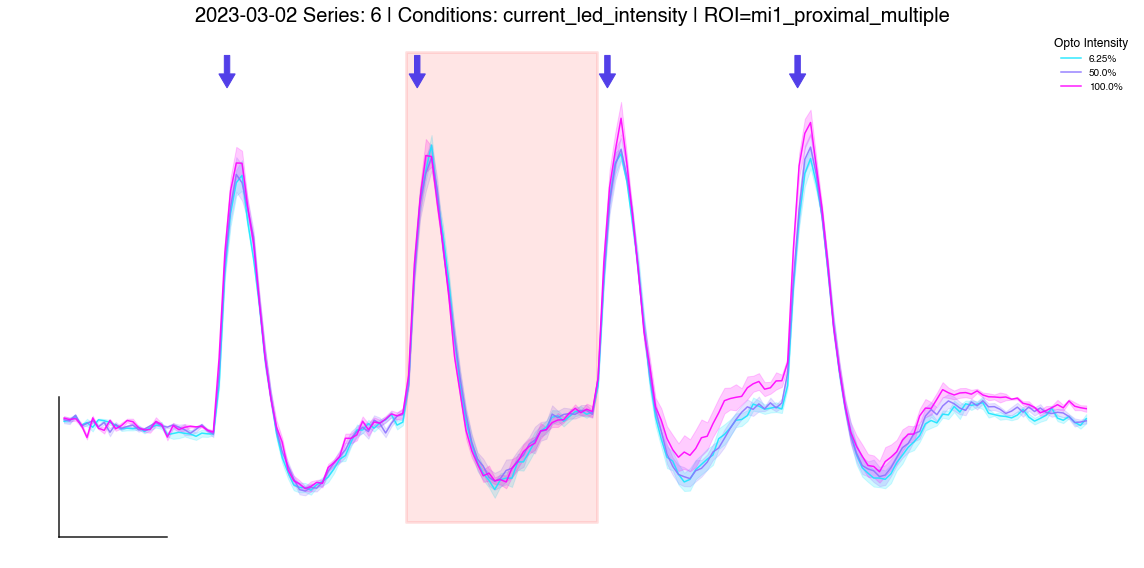

In [31]:
# FIGURE 4B. Good experimental example
plotFlashWithOptoStepTrial(mi1_prox_all[7])

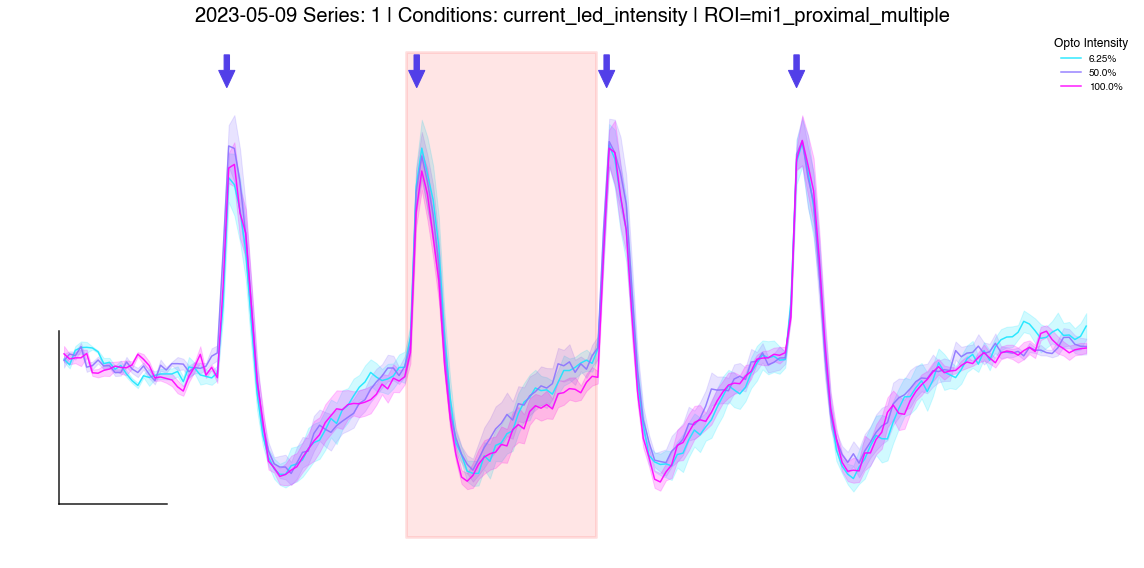

In [32]:
# Good control example
plotFlashWithOptoStepTrial(mi1_control_prox[2], save_fig=True)

In [158]:
# Function to pull and concatenate ROI data across a list of layers for an experiment type
def pullAndConcatenateROIdata(which_layer, silent=True):
    file_path = os.path.join(which_layer[0], which_layer[1] + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, which_layer[2], quiet=True)
    roi_data = ID.getRoiResponses(which_layer[3])
    _, mean_response, _, _ = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key='current_led_intensity')
    
    if silent == False:
        print(f'The shape of the mean_response array is {mean_response.shape}')

    # if less than 181 timepoints, pad with NaNs
    if mean_response.shape[2] < 181:
        mean_response = np.pad(mean_response, ((0,0),(0,0),(0,181-mean_response.shape[2])), mode='constant', constant_values=np.nan)
        if silent == False:
            print(f'Padded mean_response array to shape {mean_response.shape}')
    return mean_response

# call pullAndConcatenateROIdata() for each layer in a list of layers
def concatenateROIdata(which_layers, silent=False):
    roi_data = []
    for count, layer in enumerate(which_layers):
        if silent == False:
            # Print progress
            print(f'Starting layer {count} of {len(which_layers)}')
            print(f'Layer: {layer}')

        # if first iteration of loop, set roi_data to the first layer's data
        if len(roi_data) == 0:
            roi_data = pullAndConcatenateROIdata(layer, silent=False)
        # if not first iteration, append the next layer's data to the existing roi_data
        else:
            roi_data = np.append(roi_data, pullAndConcatenateROIdata(layer), axis=0)
    print('\n')

    print('Shape of roi_data: ', roi_data.shape)
    return roi_data

    


In [159]:
roi_data_prox_control = concatenateROIdata(mi1_control_prox, silent=False)
roi_data_prox_exp = concatenateROIdata(mi1_prox_good, silent=False)

Starting layer 0 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230317' '2023-03-17' '4'
 'mi1_proximal_multiple_morebi']
The shape of the mean_response array is (5, 3, 179)
Padded mean_response array to shape (5, 3, 181)
Starting layer 1 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230317' '2023-03-17' '5'
 'mi1_proximal_multiple']
Starting layer 2 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230509.selected' '2023-05-09' '1'
 'mi1_proximal_multiple']
Starting layer 3 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230509.selected' '2023-05-09' '2'
 'mi1_proximal_multiple']
Starting layer 4 of 5
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230509.selected' '2023-05-09' '6'
 'mi1_proximal_multiple']


Shape of roi_data:  (27, 3, 181)
Starting layer 0 of 11
Layer: ['/Volumes/ABK2TBData/data_repo/bruker/20230302' '2023-03-02' '8'
 'mi1_proximal_multiple']
The shape of the mean_response array is (6, 3, 179)
Padded mean_response array to shape (6, 3, 181)
Star

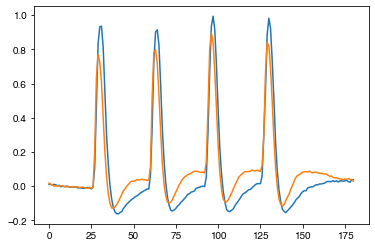

In [153]:
plt.plot(np.nanmean(roi_data_prox_control, axis=0))
plt.plot(np.nanmean(roi_data_prox_exp, axis=0))

/var/folders/3p/hy9qyl4j55bb44d1rgb4pz700000gn/T/ipykernel_38302/4252490186.py:3: RuntimeWarning: Mean of empty slice
  roi_data_control_12 = np.nanmean(roi_data_prox_control[:, 1:2, :], axis=1)
/var/folders/3p/hy9qyl4j55bb44d1rgb4pz700000gn/T/ipykernel_38302/4252490186.py:4: RuntimeWarning: Mean of empty slice
  roi_data_exp_12 = np.nanmean(roi_data_prox_exp[:, 1:2, :], axis=1)


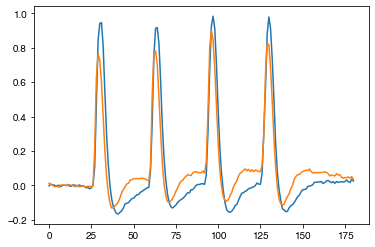

In [162]:
# Only look at the second two opto intensities

roi_data_control_12 = np.nanmean(roi_data_prox_control[:, 1:2, :], axis=1)
roi_data_exp_12 = np.nanmean(roi_data_prox_exp[:, 1:2, :], axis=1)

plt.plot(np.nanmean(roi_data_control_12, axis=0))
plt.plot(np.nanmean(roi_data_exp_12, axis=0))

## New Plotting Function for Figure 4C

Experimental vs Control Data, averaged across ROIs, not flies.
- First fig panel is each opto condition, subplot style
- Second could be averaged across opto intensity 2 and 3 and plotting the exp and control against each other
- Third is same as second but would normalize their responses to the first flash 


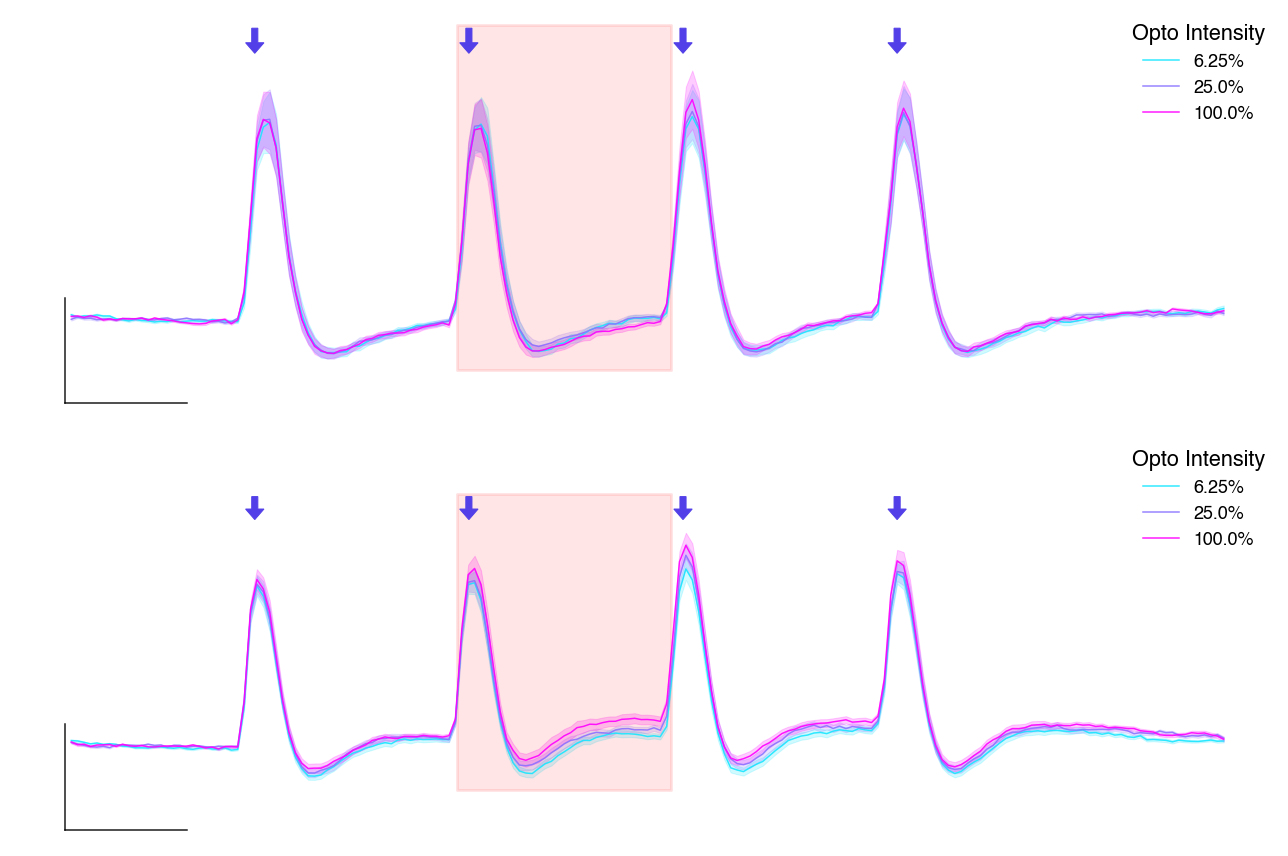

In [192]:
save_fig = True
figsize = (18, 12)

# Calculate the mean and SEM of mean_response across ROIs for roi_data_prox_control and roi_data_prox_exp
roi_data_prox_control_mean = np.nanmean(roi_data_prox_control, axis=0)
roi_data_prox_control_sem = np.nanstd(roi_data_prox_control, axis=0) / np.sqrt(roi_data_prox_control.shape[0])
roi_data_prox_control_sem_plus = roi_data_prox_control_mean + roi_data_prox_control_sem
roi_data_prox_control_sem_minus = roi_data_prox_control_mean - roi_data_prox_control_sem
roi_data_prox_exp_mean = np.nanmean(roi_data_prox_exp, axis=0)
roi_data_prox_exp_sem = np.nanstd(roi_data_prox_exp, axis=0) / np.sqrt(roi_data_prox_exp.shape[0])
roi_data_prox_exp_sem_plus = roi_data_prox_exp_mean + roi_data_prox_exp_sem
roi_data_prox_exp_sem_minus = roi_data_prox_exp_mean - roi_data_prox_exp_sem


# finding vis flash and opto flash locations
# loading in a random good file to get the flash start and end times
file_path = os.path.join(mi1_fly24_prox[0][0], mi1_fly24_prox[0][1] + ".hdf5")
ID = imaging_data.ImagingDataObject(file_path, mi1_fly24_prox[0][2], quiet=True)
roi_data = ID.getRoiResponses(mi1_fly24_prox[0][3])
unique_parameter_values, _, _, _ = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key='current_led_intensity')
flash_start, flash_end = visFlash(ID)
min_val_control = np.min(roi_data_prox_control_sem_minus)
max_val_control = np.max(roi_data_prox_control_sem_plus)
min_val_exp = np.min(roi_data_prox_exp_sem_minus)
max_val_exp = np.max(roi_data_prox_exp_sem_plus)
min_val = np.min([min_val_control, min_val_exp])
max_val = np.max([max_val_control, max_val_exp])
y_low_control = min_val_control-abs(0.22*min_val_control)
y_high_control = max_val_control+abs(0.17*max_val_control)
y_low_exp = min_val_exp-abs(0.22*min_val_exp)
y_high_exp = max_val_exp+abs(0.17*max_val_exp)
y_low = np.min([y_low_control, y_low_exp])
y_high = np.max([y_high_control, y_high_exp])

# for opto led plotting
led_start_time = ID.getRunParameters('pre_time')+ID.getRunParameters('led_time')
led_end_time = led_start_time + ID.getRunParameters('led_duration')        


# Figure plotting!
cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.1, 1.0, len(unique_parameter_values))]

fh, ax = plt.subplots(2, 1, figsize=figsize, sharex=True, sharey=True)

# Plotting the mean response across ROIs for each opto intensity
for up_ind, up in enumerate(unique_parameter_values):
    # Plotting the mean response across ROIs for each opto intensity
    ax[0].plot(roi_data['time_vector'], roi_data_prox_control_mean[up_ind, :], color=colors[up_ind], alpha=0.9, label=opto_values[up_ind])
    ax[0].fill_between(roi_data['time_vector'], roi_data_prox_control_sem_plus[up_ind, :],
                          roi_data_prox_control_sem_minus[up_ind, :],
                            color=colors[up_ind], alpha=0.2)
    ax[1].plot(roi_data['time_vector'], roi_data_prox_exp_mean[up_ind, :], color=colors[up_ind], alpha=0.9, label=opto_values[up_ind])
    ax[1].fill_between(roi_data['time_vector'], roi_data_prox_exp_sem_plus[up_ind, :],
                            roi_data_prox_exp_sem_minus[up_ind, :],
                            color=colors[up_ind], alpha=0.2)

# for each axis, plot the visual stim flashes and opto stim
for ax_ind in range(len(ax)):
    # if shared_vis_opto_plot == True;
        # # VISUAL flash stim plotting
        # for vis_ind in range(len(flash_start)):
        #     ax[ax_ind].arrow(flash_start[vis_ind], y_high, 
        #                 0, y_high*-0.05, 
        #                 width=0.1,
        #                 head_length=0.05,
        #                 color=paleDarkBlue,
        #                 )
        # # OPTO stim plotting
        # ax[ax_ind].fill_between([led_start_time, led_end_time], y_low*1.05, y_high*1.01, 
        #                 alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
    # Legend, Grid, Axis
    ax[ax_ind].legend(loc="upper right", fontsize=1*figsize[0], frameon=False, title='Opto Intensity', title_fontsize=1.2*figsize[0])
    #ax[ax_ind].legend(loc="upper right", frameon=False, title='Opto Intensity',)

    ax[ax_ind].set_xlabel('Time in Seconds')
    ax[ax_ind].set_ylabel('DF/F')
    
    # Plotting function stuff
    plot_tools.cleanAxes(ax[ax_ind])
    plot_tools.addScaleBars(ax[ax_ind], dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)

# Opto stim plotting
ax[0].fill_between([led_start_time, led_end_time], y_low_control*1.05, y_high_control*1.01,
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
ax[1].fill_between([led_start_time, led_end_time], y_low_exp*1.05, y_high_exp*1.01,
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
# Visual flash stim plotting
for vis_ind in range(len(flash_start)):
    ax[0].arrow(flash_start[vis_ind], y_high_control, 
                0, y_high_control*-0.05, 
                width=0.1,
                head_length=0.05,
                color=paleDarkBlue,
                )
    ax[1].arrow(flash_start[vis_ind], y_high_exp,
                0, y_high_exp*-0.05,
                width=0.1,
                head_length=0.05,
                color=paleDarkBlue,
                )


fh.set_tight_layout(True)


if save_fig == True:
    fh.savefig(
    save_directory
    + "4C.AverageTracesCrossCondition.ByROI"
    + ".pdf",
    dpi=300, bbox_inches='tight', transparent=True,
    )

## 4C a different way

Averaging arcross last two opto intentsities.  
Remember python slicing is array[start:stop] 

/var/folders/3p/hy9qyl4j55bb44d1rgb4pz700000gn/T/ipykernel_38302/3554159397.py:3: RuntimeWarning: Mean of empty slice
  con_sem_opto23 = np.nanstd(np.nanmean(roi_data_prox_control[:, 1:3, :], axis=1), axis=0) / np.sqrt(roi_data_prox_control.shape[0])
/var/folders/3p/hy9qyl4j55bb44d1rgb4pz700000gn/T/ipykernel_38302/3554159397.py:5: RuntimeWarning: Mean of empty slice
  exp_sem_opto23 = np.nanstd(np.nanmean(roi_data_prox_exp[:, 1:3, :], axis=1), axis=0) / np.sqrt(roi_data_prox_exp.shape[0])


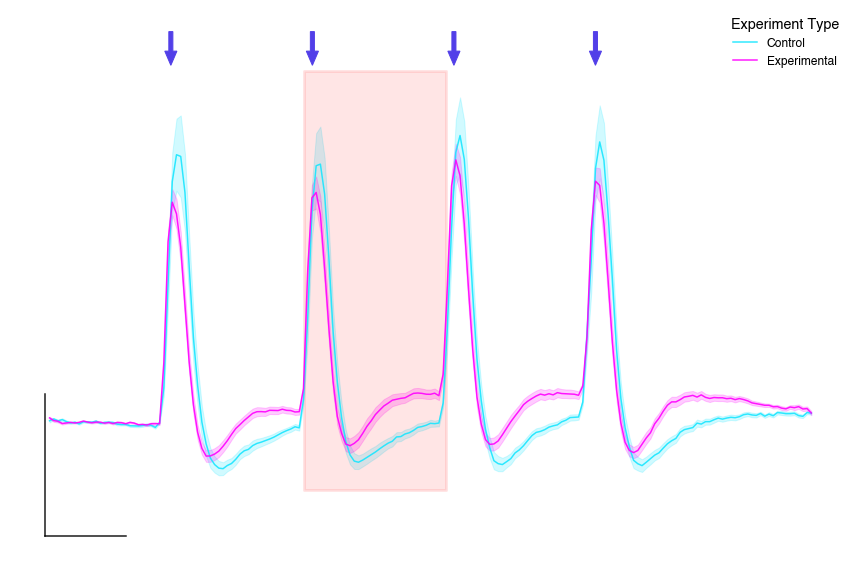

In [228]:
# Calculate the mean and SEM across the second two opto intensities for roi_data_prox_control and roi_data_prox_exp
con_mean_opto23 = np.nanmean(np.nanmean(roi_data_prox_control[:, 1:3, :], axis=0), axis=0)
con_sem_opto23 = np.nanstd(np.nanmean(roi_data_prox_control[:, 1:3, :], axis=1), axis=0) / np.sqrt(roi_data_prox_control.shape[0])
exp_mean_opto23 = np.nanmean(np.nanmean(roi_data_prox_exp[:, 1:3, :], axis=0), axis=0)
exp_sem_opto23 = np.nanstd(np.nanmean(roi_data_prox_exp[:, 1:3, :], axis=1), axis=0) / np.sqrt(roi_data_prox_exp.shape[0])

# Figure plotting!
save_fig = False
figsize = (12, 8)

cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.1, 1.0, 2)]

fh, ax = plt.subplots(1, 1, figsize=figsize, sharex=True, sharey=True)
# Plotting the mean and sem for control and opto data
ax.plot(roi_data['time_vector'], con_mean_opto23, color=colors[0], alpha=0.9, label='Control')
ax.fill_between(roi_data['time_vector'], con_mean_opto23+con_sem_opto23,
                con_mean_opto23-con_sem_opto23, color=colors[0], alpha=0.2)
ax.plot(roi_data['time_vector'], exp_mean_opto23, color=colors[1], alpha=0.9, label='Experimental')
ax.fill_between(roi_data['time_vector'], exp_mean_opto23+exp_sem_opto23,
                exp_mean_opto23-exp_sem_opto23, color=colors[1], alpha=0.2)

# Opto stim plotting
ax.fill_between([led_start_time, led_end_time], y_low_control*1.03, y_high_control*0.9,
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
# Visual flash stim plotting
for vis_ind in range(len(flash_start)):
    ax.arrow(flash_start[vis_ind], y_high_control, 
                0, y_high_control*-0.05, 
                width=0.1,
                head_length=0.05,
                color=paleDarkBlue,
                )
    
# Legend, Grid, Axis
plot_tools.cleanAxes(ax)
ax.legend(loc="upper right", fontsize=1*figsize[0], frameon=False, title='Experiment Type', title_fontsize=1.2*figsize[0])
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('DF/F')
# Plotting function stuff
plot_tools.addScaleBars(ax, dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)

fh.set_tight_layout(True)

if save_fig == True:
    fh.savefig(
    save_directory
    + "4C.AverageTracesOpto23.ByROI"
    + ".pdf",
    dpi=300, bbox_inches='tight', transparent=True,
    )

Optionally, find the max value of the control condition and scale the experimental condition to that value.

/var/folders/3p/hy9qyl4j55bb44d1rgb4pz700000gn/T/ipykernel_38302/595076794.py:12: RuntimeWarning: Mean of empty slice
  exp_sem_opto23_scaled = np.nanstd(np.nanmean(roi_data_prox_exp[:, 1:3, :], axis=1)*ratio_max, axis=0) / np.sqrt(roi_data_prox_exp.shape[0])


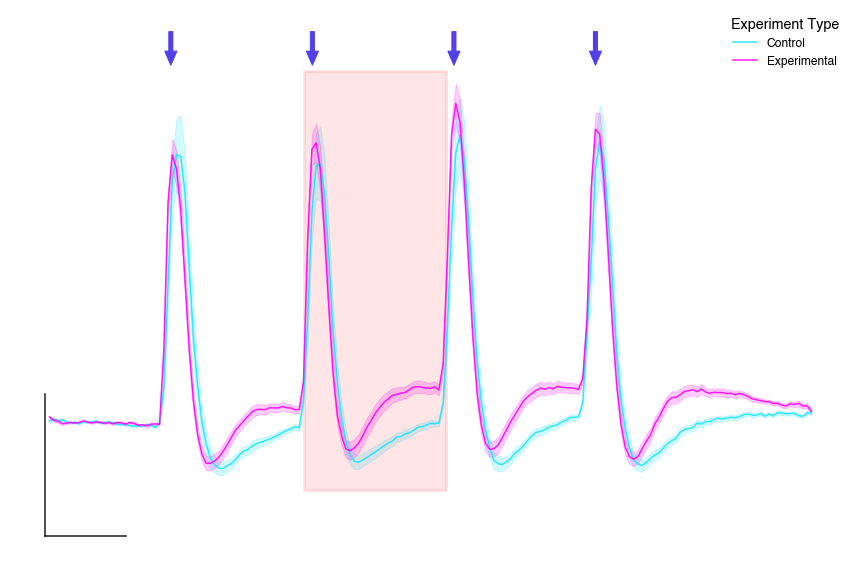

In [266]:
#   Find the max value of the control between vis flash 1 and 2 and scale the experimental condition to that value.
# Find the points in the time vector that is closest to the start and end of the first visual flash
vis_flash1_start = np.argmin(np.abs(roi_data['time_vector'] - flash_start[0]))
vis_flash1_end = np.argmin(np.abs(roi_data['time_vector'] - flash_end[0])) - 2 # just to ensure we aren't grabbing the next vis flash
# find the max value of the control data between vis_flash1_start and vis_flash1_end
con_max = np.nanmax(con_mean_opto23[vis_flash1_start:vis_flash1_end])
# find the max value of the experimental data between vis_flash1_start and vis_flash1_end
exp_max = np.nanmax(exp_mean_opto23[vis_flash1_start:vis_flash1_end])
# scale the experimental data by the ratio of con_max to exp_max
ratio_max = con_max / exp_max
exp_mean_opto23_scaled = np.nanmean(np.nanmean(roi_data_prox_exp[:, 1:3, :], axis=0)*ratio_max, axis=0)
exp_sem_opto23_scaled = np.nanstd(np.nanmean(roi_data_prox_exp[:, 1:3, :], axis=1)*ratio_max, axis=0) / np.sqrt(roi_data_prox_exp.shape[0])

# Figure plotting!
save_fig = False
figsize = (12, 8)

cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.1, 1.0, 2)]

fh, ax = plt.subplots(1, 1, figsize=figsize, sharex=True, sharey=True)
# Plotting the mean and sem for control and opto data
ax.plot(roi_data['time_vector'], con_mean_opto23, color=colors[0], alpha=0.9, label='Control')
ax.fill_between(roi_data['time_vector'], con_mean_opto23+con_sem_opto23,
                con_mean_opto23-con_sem_opto23, color=colors[0], alpha=0.2)
ax.plot(roi_data['time_vector'], exp_mean_opto23_scaled, color=colors[1], alpha=0.9, label='Experimental')
ax.fill_between(roi_data['time_vector'], exp_mean_opto23_scaled+exp_sem_opto23_scaled,
                exp_mean_opto23_scaled-exp_sem_opto23_scaled, color=colors[1], alpha=0.2)

# Opto stim plotting
ax.fill_between([led_start_time, led_end_time], y_low_control*1.03, y_high_control*0.9,
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
# Visual flash stim plotting
for vis_ind in range(len(flash_start)):
    ax.arrow(flash_start[vis_ind], y_high_control, 
                0, y_high_control*-0.05, 
                width=0.1,
                head_length=0.05,
                color=paleDarkBlue,
                )
    
# Legend, Grid, Axis
plot_tools.cleanAxes(ax)
ax.legend(loc="upper right", fontsize=1*figsize[0], frameon=False, title='Experiment Type', title_fontsize=1.2*figsize[0])
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('DF/F')
# Plotting function stuff
plot_tools.addScaleBars(ax, dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)

fh.set_tight_layout(True)

if save_fig == True:
    fh.savefig(
    save_directory
    + "4C.AverageTracesOpto23.ByROI.scaled"
    + ".pdf",
    dpi=300, bbox_inches='tight', transparent=True,
    )

## Load in Metrics Data
By ROI and by Fly

In [54]:
exp_control_rnai_by_roi = pd.read_pickle(save_directory + 'exp_control_rnai_by_roi.pkl')
exp_control_rnai_by_fly = pd.read_pickle(save_directory + 'exp_control_rnai_by_fly.pkl')

## Violin Plot time

The first violin plot is for Fig - Mi1 D. It looks at the first vs third window and plots all opto intensities for the experimental condition. The goal is to show the effects of different opto intensities. 

Ideally Opto intensity 1 and 2 can be combined if they are statistically similar. 

Number of Observations per group: 
 69


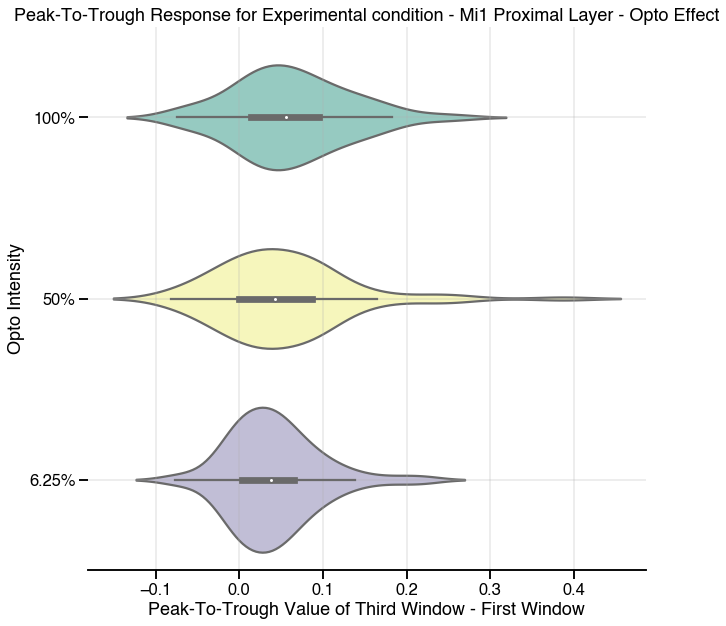

In [88]:
which_df = exp_control_rnai_by_roi
which_str = 'Experimental'
which_metric = 'PtT' # 'PtT' 'Mean' 'Max' 'Min'
save_fig = False

prox_win02_df = which_df.loc[(which_df['Window'] == 1) & (which_df['Layer'] == 'Proximal') & (which_df['Type'] == which_str)]
df_to_plot = prox_win02_df

pally = 'Set3' # Set3 pastel
contrast_color = "coral"
fig_box, ax_box_mean = plt.subplots(1, figsize = (10, 10))
sns.violinplot(
    ax=ax_box_mean, data=df_to_plot, x=which_metric, y="Opto", palette=pally, orient="h", order=[2,1,0],
    medianprops={"color": contrast_color}, whiskerprops={"color":contrast_color}, capprops={"color":contrast_color}, 
    flierprops={"markerfacecolor":contrast_color, "markeredgecolor":contrast_color, 'markersize': 10}, boxprops={"edgecolor":contrast_color},        
    )

ax_box_mean.set(xlabel='Peak-To-Trough Value of Third Window - First Window')
ax_box_mean.set(ylabel='Opto Intensity')
# set y axis tick labels
ax_box_mean.set_yticklabels(['100%', '50%', '6.25%'])
ax_box_mean.set_title(f'Peak-To-Trough Response for {which_str} condition - Mi1 Proximal Layer - Opto Effect')
sns.despine(fig=fig_box, left=True)
sns.set_context("talk")
ax_box_mean.grid(alpha=0.3)

# calculate the number of obs per group & median to position labels
medians = df_to_plot.groupby(['Opto'])['Mean'].median().values
nobs = df_to_plot['Opto'].value_counts().values
print('Number of Observations per group: \n', nobs[0])

if save_fig == True:
    fig_box.savefig(
    save_directory
    + "D.Summary"
    + str(which_metric)
    + "BoxPlotThirdWindow.Proximal.",
    dpi=300, bbox_inches='tight', transparent=True,
    )

In [90]:
print(f'The number of ROIs going into each violin plot is:\n{nobs[0]}')

The number of ROIs going into each violin plot is:
 69


Quickly calc some stats to add them to the plot above

In [76]:
prox_win02_df
metric = 'PtT'

opto_0_sub_df = prox_win02_df.loc[prox_win02_df['Opto'] == 0][metric]
opto_1_sub_df = prox_win02_df.loc[prox_win02_df['Opto'] == 1][metric]
opto_2_sub_df = prox_win02_df.loc[prox_win02_df['Opto'] == 2][metric]

# Testing for homogeneity. P-value > 0.05 means we can assume homogeneity of variance
print('-------------------------------------------')
print('Testing for homogeneity of variance')
opto_0v1_stat, opto_0v1_p = stats.levene(opto_0_sub_df, opto_1_sub_df)
print('Opto 0 vs 1: Levene Statistic = %.3f, p = %.3f' % (opto_0v1_stat, opto_0v1_p))
opto_0v2_stat, opto_0v2_p = stats.levene(opto_0_sub_df, opto_2_sub_df)
print('Opto 0 vs 2: Levene Statistic = %.3f, p = %.3f' % (opto_0v2_stat, opto_0v2_p))
opto_1v2_stat, opto_1v2_p = stats.levene(opto_1_sub_df, opto_2_sub_df)
print('Opto 1 vs 2: Levene Statistic = %.3f, p = %.3f' % (opto_1v2_stat, opto_1v2_p))
print('-------------------------------------------')

# Testing for normality. P-value > 0.05 means we can assume normality
print('-------------------------------------------')
print('Testing for normality')
opto_0_stat, opto_0_p = stats.shapiro(opto_0_sub_df)
print('Opto 0: Shapiro Statistic = %.3f, p = %.3f' % (opto_0_stat, opto_0_p))
opto_1_stat, opto_1_p = stats.shapiro(opto_1_sub_df)
print('Opto 1: Shapiro Statistic = %.3f, p = %.3f' % (opto_1_stat, opto_1_p))
opto_2_stat, opto_2_p = stats.shapiro(opto_2_sub_df)
print('Opto 2: Shapiro Statistic = %.3f, p = %.3f' % (opto_2_stat, opto_2_p))
print('-------------------------------------------')


-------------------------------------------
Testing for homogeneity of variance
Opto 0 vs 1: Levene Statistic = 4.545, p = 0.035
Opto 0 vs 2: Levene Statistic = 4.428, p = 0.037
Opto 1 vs 2: Levene Statistic = 0.118, p = 0.732
-------------------------------------------
-------------------------------------------
Testing for normality
Opto 0: Shapiro Statistic = 0.947, p = 0.006
Opto 1: Shapiro Statistic = 0.903, p = 0.000
Opto 2: Shapiro Statistic = 0.982, p = 0.430
-------------------------------------------


Only 1 vs 2 is homogeneous. Only 2 is normal. Non-parametric it is

In [78]:
# Test for significant difference between groups using Wilcoxon Rank Sum Test
print('-------------------------------------------')
print('Testing for significant difference between groups')
opto_results = pg.pairwise_tests(dv=metric, between='Opto', data=prox_win02_df, parametric=False, alternative='less')
opto_results



-------------------------------------------
Testing for significant difference between groups


,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,Opto,0,1,False,False,2223.0,less,0.251888,-0.166367
1,Opto,0,2,False,False,1902.0,less,0.020901,-0.331426
2,Opto,1,2,False,False,2105.0,less,0.120791,-0.123250


In the third - first window, for the PtT metric:
 - Opto 0 NOT singificantly less than 1
 - Opto 0 YES significantly less than 2
 - Opto 1 NOT significantly less than 2. 

 With opto 1 and 2 not being statistically different, combine them. 

## Mi1 Fig E

This figure shows the Exp vs Control vs RNAi for each window plotted as violin plots. Only the opto 1 and 2 will be used. 

[This site](https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/) is useful for violin plot params

In [103]:
# get the correct dataframe set up
which_df_placeholder = exp_control_rnai_by_roi
# copy, don't just set equal. Then combine the opto intensities 1 and 2
prox_opto12_df = which_df_placeholder.loc[(which_df_placeholder['Layer'] == 'Proximal') & (which_df_placeholder['Opto'] != 0)]
prox_comb_opto12_df = prox_opto12_df.copy()
prox_comb_opto12_df.loc[prox_comb_opto12_df['Opto'] == 2, 'Opto'] = 1
prox_comb_opto12_df.head()

,ROI,Layer,Mean,SEM_Mean,Min,Max,PtT,Opto,Window,Type
3,0,Proximal,0.304191,0.065004,0.132004,0.106842,0.062427,1,0,Experimental
4,0,Proximal,0.340892,0.088450,0.231649,0.132454,0.070778,1,1,Experimental
5,0,Proximal,0.309373,0.039621,0.097993,0.083628,0.048282,1,2,Experimental
6,0,Proximal,0.282848,0.036094,0.271710,0.080953,0.025780,1,0,Experimental
7,0,Proximal,0.304102,0.074928,0.202033,0.148972,0.095004,1,1,Experimental


In [105]:
config_matplotlib()

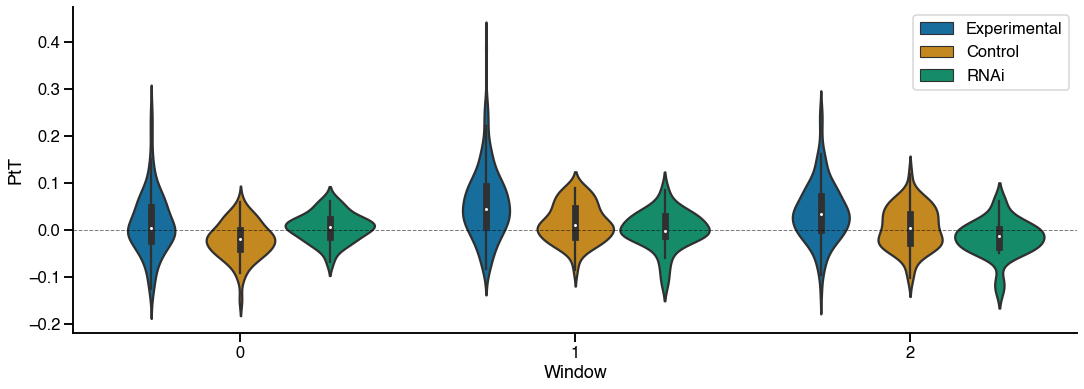

In [122]:
save_fig = True

win_set = [0, 1, 2]
type_set = ['Experimental', 'Control', 'RNAi']
dv = 'PtT' # PtT Max 

comp_fig, comp_ax = plt.subplots(1, figsize=(6*len(win_set), 6))
sns.violinplot(
    ax=comp_ax, data=prox_comb_opto12_df, x='Window', y=dv, hue='Type', palette='colorblind', orient='v', #scale='count'
)
comp_ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5) # plot a horizontal line at 0

# Cleaning up the plot
comp_ax.legend(title='',)
sns.despine(fig=comp_fig, top=True, right=True)

if save_fig == True:
    comp_fig.savefig(
        save_directory
        + "E.Summary"
        + str(dv)
        + "ViolinPlotAllWindows.Proximal.",
        dpi=300, bbox_inches='tight', transparent=False,
    )

# Stats Time!

maybe use [this](https://towardsdatascience.com/statsannotations-add-statistical-significance-annotations-on-seaborn-plots-6b753346a42a) for an auto stats+annotations adder

## Assumptions Testing

We want to see if we can run parametric tests. For that to work, the data needs to be homogenous in its variance and normal in its distribution

In [18]:
which_df = exp_control_rnai_by_roi
win = 2
opto = 2
dv = 'PtT' # Max, Min, PtT, Mean
exp_sub_df = which_df.loc[(which_df['Window'] == win) & (which_df['Layer'] == 'Proximal') & (which_df['Opto'] == opto) & (which_df['Type'] == 'Experimental')][dv]
con_sub_df = which_df.loc[(which_df['Window'] == win) & (which_df['Layer'] == 'Proximal') & (which_df['Opto'] == opto) & (which_df['Type'] == 'Control')][dv]
rnai_sub_df = which_df.loc[(which_df['Window'] == win) & (which_df['Layer'] == 'Proximal') & (which_df['Opto'] == opto) & (which_df['Type'] == 'RNAi')][dv]

# Testing for homogeneity. P-value > 0.05 means we can assume homogeneity of variance
print('-------------------------------------------')
print('HOMOGENEITY TESTING')
expXcon_stat, expXcon_pval = stats.levene(exp_sub_df, con_sub_df)
print(f'Experimental and Control conditions:')
print(f'    P-value = {expXcon_pval}')
print(f'    Test-stat = {expXcon_stat}\n')

expXrnai_stat, expXrnai_pval = stats.levene(exp_sub_df, rnai_sub_df)
print(f'Experimental and RNAi conditions:')
print(f'    P-value = {expXrnai_pval}')
print(f'    Test-stat = {expXrnai_stat}\n')

conXrnai_stat, conXrnai_pval = stats.levene(con_sub_df, rnai_sub_df)
print(f'Control and RNAi conditions:')
print(f'    P-value = {conXrnai_pval}')
print(f'    Test-stat = {conXrnai_stat}\n')

# - Exp v Control not homogeneous, exp v rnai not homogeneous, control v rnai YES homogeneous

print('-------------------------------------------')
# Testing for normality - Shapiro-Wilk test
print('NORMALITY TESTING')
exp_norm_stat, exp_norm_pval = stats.shapiro(exp_sub_df)
print('Experimental condition:')
print(f'    P-value = {exp_norm_pval}')
print(f'    Test-stat = {exp_norm_stat}\n')
con_norm_stat, con_norm_pval = stats.shapiro(con_sub_df)
print('Control condition:')
print(f'    P-value = {con_norm_pval}')
print(f'    Test-stat = {con_norm_stat}\n')
rnai_norm_stat, rnai_norm_pval = stats.shapiro(rnai_sub_df)
print('RNAi condition:')
print(f'    P-value = {rnai_norm_pval}')
print(f'    Test-stat = {rnai_norm_stat}\n')


-------------------------------------------
HOMOGENEITY TESTING
Experimental and Control conditions:
    P-value = 0.1515895409481637
    Test-stat = 2.088295191413647

Experimental and RNAi conditions:
    P-value = 0.0037584429754746688
    Test-stat = 8.892105239172597

Control and RNAi conditions:
    P-value = 0.004349753375404363
    Test-stat = 8.99929966227928

-------------------------------------------
NORMALITY TESTING
Experimental condition:
    P-value = 0.310799777507782
    Test-stat = 0.9793708324432373

Control condition:
    P-value = 0.11697807163000107
    Test-stat = 0.9468135833740234

RNAi condition:
    P-value = 0.1726091057062149
    Test-stat = 0.9206210374832153



Cool. So while normal in its distribution, these data are definitely not homogenous in their variance. 

As a small aside, I did this again but collapsed the opto intensities 1 and 2. All that did was also mess up normality.

## Wilcox tests on the various windows and opto intensities

Since we failed our normality+homogeneity tests, we get to do things *non-parametrically* woo
**Note** I got some help from from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html 

In [8]:
which_df = exp_control_rnai_by_roi
# All experimental types, one window and opto
win_set = [0, 1, 2]
opto_set = [0, 1, 2]
type_set = ['Experimental', 'Control', 'RNAi']
dv = 'PtT' # 'Max', 'Mean', 'PtT'
for win_ind, win in enumerate(win_set):
    print(f'Stats for {dv} metric, single conditions, window {win_set[win_ind]+2} - window 1\n')
    for opto_ind, opto in enumerate(opto_set):
        print(f'            - Opto intensity value = {opto} -')
        for type_ind, type_i in enumerate(type_set):
            prox_df = which_df.loc[(which_df['Window'] == win) & (which_df['Layer'] == 'Proximal') & (which_df['Opto'] == opto)]
            # Test of differences for one specific condition and opto, for a single metric
            res_exp = wilcoxon(prox_df[prox_df['Type'] == type_set[type_ind]][[dv]], alternative='greater', correction=True)
            print(f'{type_set[type_ind]} Condition:         P-value = {res_exp.pvalue}  |   statistic = {res_exp.statistic}')
    print('\n\n')

Stats for PtT metric, single conditions, window 2 - window 1

            - Opto intensity value = 0 -
Experimental Condition:         P-value = [0.01267078]  |   statistic = [1582.]
Control Condition:         P-value = [0.70941585]  |   statistic = [235.]
RNAi Condition:         P-value = [0.99087524]  |   statistic = [24.]
            - Opto intensity value = 1 -
Experimental Condition:         P-value = [0.07066713]  |   statistic = [1454.]
Control Condition:         P-value = [0.99977292]  |   statistic = [77.]
RNAi Condition:         P-value = [0.39097595]  |   statistic = [74.]
            - Opto intensity value = 2 -
Experimental Condition:         P-value = [0.12672824]  |   statistic = [1399.]
Control Condition:         P-value = [0.97466433]  |   statistic = [160.]
RNAi Condition:         P-value = [0.06486511]  |   statistic = [98.]



Stats for PtT metric, single conditions, window 3 - window 1

            - Opto intensity value = 0 -
Experimental Condition:         P-valu

As you can see, in the window 3 - window 1 block, the differences in my metric (peak-to-trough) from zero are significant for 
- Experimental condition
- Control condition
- RNAi condition 
at opto intensity 2 (100% power). 

In the window 4-1 block, it's the same story, except for the RNAi condition. 

If we combine opto intensity 1 and 2 (which we think is fair), then here's what we see instead:

In [10]:
comb_df = exp_control_rnai_by_roi.copy()
comb_df.loc[comb_df['Opto'] == 2, 'Opto'] = 1
win_set = [0, 1, 2]
opto_set = [0, 1]
type_set = ['Experimental', 'Control', 'RNAi']
dv = 'PtT' # 'Max', 'Mean', 'PtT'
for win_ind, win in enumerate(win_set):
    print(f'Stats for {dv} metric, single conditions, window {win_set[win_ind]+2} - window 1')
    for opto_ind, opto in enumerate(opto_set):
        print(f'            - Opto intensity value = {opto} -')
        for type_ind, type_i in enumerate(type_set):
            prox_df = comb_df.loc[(comb_df['Window'] == win) & (comb_df['Layer'] == 'Proximal') & (comb_df['Opto'] == opto)]
            # Test of differences for one specific condition and opto, for a single metric
            res_exp = wilcoxon(prox_df[prox_df['Type'] == type_set[type_ind]][[dv]], alternative='greater', correction=True)
            print(f'{type_set[type_ind]} Condition:         P-value = {res_exp.pvalue}  |   statistic = {res_exp.statistic}')
        #print('\n')
    print('\n')

Stats for PtT metric, single conditions, window 2 - window 1
            - Opto intensity value = 0 -
Experimental Condition:         P-value = [0.01267078]  |   statistic = [1582.]
Control Condition:         P-value = [0.70941585]  |   statistic = [235.]
RNAi Condition:         P-value = [0.99087524]  |   statistic = [24.]
            - Opto intensity value = 1 -
Experimental Condition:         P-value = [0.02681752]  |   statistic = [5704.]
Control Condition:         P-value = [0.99996077]  |   statistic = [450.]
RNAi Condition:         P-value = [0.1102886]  |   statistic = [330.]


Stats for PtT metric, single conditions, window 3 - window 1
            - Opto intensity value = 0 -
Experimental Condition:         P-value = [1.2558886e-08]  |   statistic = [2140.]
Control Condition:         P-value = [0.07626883]  |   statistic = [341.]
RNAi Condition:         P-value = [0.98550415]  |   statistic = [27.]
            - Opto intensity value = 1 -
Experimental Condition:         P-val

Now, when looking at the peak-to-trough metric, here's a breakdown of what is significant across each window comparison:

**Window 2 - Window 1:** 
- lowest opto intensity: Only the experimental condition
- combined 50 and 100% opto intensities: Only the experimental condition

**Window 3 - Window 1:**
- lowest opto intensity: Only the experimental condition
- combined 50, 100%: Experimental and control. **This is the red light effect + opto-mediated effect.**

**Window 4 - Window 1:**
- lowest opto intensity: Only the experimental condition
- combined 50 and 100% opto intensities: Only the experimental condition


Now, we're starting to see how the experimental and control separate, especially looking at Window 3 vs Window 4. 

## Kruskal-Wallis Tests

In [27]:
win =1
dv = 'PtT' # 'Max' 'Mean' 'PtT'
opto_1 = which_df.loc[(which_df['Window'] == win) & (which_df['Layer'] == 'Proximal') & (which_df['Opto'] == 1)][["Type", dv]]
opto_2 = which_df.loc[(which_df['Window'] == win) & (which_df['Layer'] == 'Proximal') & (which_df['Opto'] == 2)][["Type", dv]]
# concatenate the two dataframes
opto_1_2 = pd.concat([opto_1, opto_2])

# Kruskal-Wallis test
kruskal = pg.kruskal(data=opto_1_2, dv=dv, between='Type', detailed=True) # Neat
print(f'KRUSKAL-WALLIS Test for {dv} differences across conditions, window 3-1, opto 1 and 2 combined')
print(kruskal)


KRUSKAL-WALLIS Test for PtT differences across conditions, window 3-1, opto 1 and 2 combined
        Source  ddof1          H         p-unc
Kruskal   Type      2  30.696192  2.159766e-07


Cool, there's something significant here. We've got to do some pairwise comparisons to see which it is

## Wilcoxon signed-rank test 

We run this because again, we failed the assumptions test before. 

Going with one-step Bonferroni correction and an alternative hypothesis as one-sided.

In [28]:
is_par = False
adj_type = 'bonf' # 'bonf'
alt_hypo = 'less' # 'two-sided' or 'greater'
paired_t_results = pg.pairwise_tests(data=opto_1_2, dv=dv, between='Type', parametric=is_par, padjust=adj_type, effsize='cohen', alternative=alt_hypo)

print('--------------------------------------------------------------------------------------')
print(f'PAIRED T-TESTS for {dv} differences across conditions, window 3-1, opto 1 and 2 combined')
print('This is Wilcoxon signed-rank test results b/c non-parametric:')
print(f'Parameters - parametric = {is_par}, padjust = {adj_type}, alternative = {alt_hypo}')
print(f'Exp v Con:      P-Value: {paired_t_results.loc[0, "p-unc"]}, effect size = {paired_t_results.loc[0, "cohen"]}')
print(f'Con v RNAi:     P-Value: {paired_t_results.loc[1, "p-unc"]}, effect size = {paired_t_results.loc[1, "cohen"]}')
print(f'Exp v RNAi:     P-Value: {1-paired_t_results.loc[2, "p-unc"]}, effect size = {paired_t_results.loc[2, "cohen"]}')


--------------------------------------------------------------------------------------
PAIRED T-TESTS for PtT differences across conditions, window 3-1, opto 1 and 2 combined
This is Wilcoxon signed-rank test results b/c non-parametric:
Parameters - parametric = False, padjust = bonf, alternative = less
Exp v Con:      P-Value: 1.2449577346289196e-05, effect size = -0.6292744687889142
Con v RNAi:     P-Value: 0.9100029852870517, effect size = 0.37702388717781393
Exp v RNAi:     P-Value: 3.684668511416689e-06, effect size = 0.8099846287938579


And there it is.  
Experimental vs Control conditions:  
**SIGNIFICANT** at p<0.001  

Experimental vs RNAi conditions:     
**SIGNIFICANT** at p<0.001  

Control vs RNAi conditions:          
**NOT** significant at p=0.984